In [2]:
using Pkg
Pkg.activate("test_diom_tr")

Pkg.develop(path="/home/corde/Krylov.jl")
Pkg.develop(path="/home/corde/JSOSolvers.jl")

# Pkg.add("OptimizationProblems")
# Pkg.add("SolverTools")
# Pkg.add("SolverCore")
# Pkg.add("SolverBenchmark")
# Pkg.add("NLPModelsIpopt")
# Pkg.add("JLD2")
# Pkg.add("Plots")

using LinearAlgebra, NLPModels, ADNLPModels, Printf, LinearOperators, Krylov
using OptimizationProblems, OptimizationProblems.ADNLPProblems, JSOSolvers, SolverTools, SolverCore, SolverBenchmark, NLPModelsIpopt
using JLD2, Plots

  Activating project at `~/mth8408/projet/test_diom_tr`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`
   Resolving package versions...
  No Changes to `~/mth8408/projet/test_diom_tr/Project.toml`
  No Changes to `~/mth8408/projet/test_diom_tr/Manifest.toml`


In [3]:
meta = OptimizationProblems.meta
problem_list = meta[(meta.variable_nvar.==true).&(meta.ncon.==0).&.!meta.has_bounds.&(meta.minimize.==true), :name]

88-element Vector{String}:
 "NZF1"
 "arglina"
 "arglinb"
 "arglinc"
 "argtrig"
 "arwhead"
 "auglag"
 "bdqrtic"
 "boundary"
 "brownal"
 ⋮
 "sparsqur"
 "spmsrtls"
 "srosenbr"
 "tointgss"
 "tquartic"
 "tridia"
 "vardim"
 "variational"
 "woods"

In [19]:
probs = OptimizationProblems.meta

large_scale = true
N = 1000

if large_scale
    problem_names = probs[(probs.ncon .== 0) .& .!probs.has_bounds .& (probs.variable_nvar .== true) .& (meta.minimize.==true), :name]
else
    problem_names = probs[(probs.ncon .== 0) .& .!probs.has_bounds .& (80 .<= probs.nvar .<= 100) .& (meta.minimize.==true), :name]
    # problem_names = probs[(probs.ncon .== 0) .& .!probs.has_bounds .& (5 .<= probs.nvar .<= 40) .& (meta.minimize.==true), :name]
end

problems = (eval(Meta.parse(problem))(n=N) for problem ∈ problem_names)

problem_names

88-element Vector{String}:
 "NZF1"
 "arglina"
 "arglinb"
 "arglinc"
 "argtrig"
 "arwhead"
 "auglag"
 "bdqrtic"
 "boundary"
 "brownal"
 ⋮
 "sparsqur"
 "spmsrtls"
 "srosenbr"
 "tointgss"
 "tquartic"
 "tridia"
 "vardim"
 "variational"
 "woods"

In [20]:
solvers = Dict(
    :ipopt => nlp -> ipopt(nlp, print_level=0),
    :trunk_cg => nlp -> trunk(nlp, verbose=0),
    # :trunk_diom_2 => nlp -> trunk(nlp, verbose=0, subsolver=:diom, subsolver_kwargs=(memory=2,)),
    # :trunk_diom_50 => nlp -> trunk(nlp, verbose=0, subsolver=:diom, subsolver_kwargs=(memory=50,)),
)


Dict{Symbol, Function} with 2 entries:
  :ipopt    => #59
  :trunk_cg => #60

In [ ]:
# solve problems, but skip one of our choice
to_skip = ["thurber"]
stats = bmark_solvers(solvers, problems, skipif = prob -> prob.meta.name ∈ to_skip)

# save DataFrame for later
# see JLD2 documentation
@save "stats_opt_problems.jld2" stats

# plot time profile
# performance_profile(stats, df -> df.neval_obj)
performance_profile(stats, df -> df.iter)

┌ Info: running solver ipopt
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/bmark_solvers.jl:21
┌ Info:          Solver             Name    nvar    ncon           status    iter      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:97
┌ Info:           ipopt             NZF1     988       0      first_order       6   2.3e-01   3.4e+05   2.2e-11   0.0e+00
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:194
┌ Info:           ipopt          arglina    1000       0      first_order       1   6.8e+00   5.0e+02   4.9e-14   0.0e+00
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:194
┌ Info:           ipopt          arglinb    1000       0       acceptable      18   8.5e+01   2.5e+02   6.2e-08   0.0e+00
└ @ SolverBenchmark /home/corde/.julia/packages/SolverBenchmark/HQUOd/src/run_solver.jl:194
┌ Info:           ip

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /home/corde/.julia/packages/BenchmarkProfiles/NM9XN/src/performance_profiles.jl:16


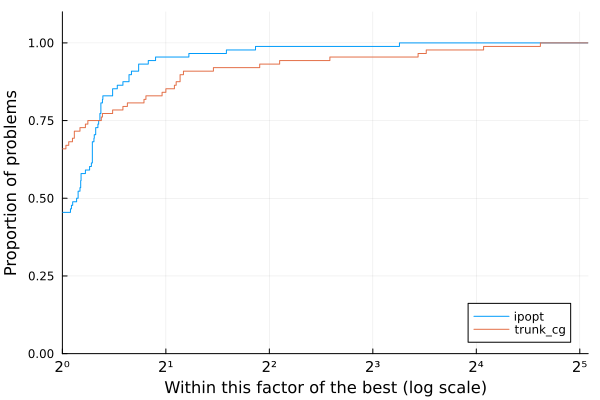

In [18]:
# performance_profile(stats, df -> df.neval_hprod)
performance_profile(stats, df -> df.neval_grad)